## SGD(확률적 경사 하강법)

In [1]:
class SGD:
    def __init__(self,lr=0.01):
        self.lr=lr
        return
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= grads[key]*self.lr
            
        return

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Momentum(모맨텀)

In [3]:
class Momentum:
    def __init__(self,lr=0.01,momentum=0.9):
        self.lr=lr
        slef.momentum=momentum
        self.v=None
        return
    def update(self,params,grads):
        if self.v is None:
            self.v={}
            for key,val in params.items():
                self.v[key]= np.zeros.like(val)
                
            
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]
        

## AdaGrad
#### 학습률을 각 매개변수에 맞춰서 값을 서서히 줄여준다.

In [4]:
class AdaGrad:
    def __init__(self,lr=0.01):
        self.lr=lr
        self.h=None
        return
    def update(self,params,grads):
        if self.h is None:
            self.h={}
            for key,val in parms.items():
                self.h[key] = np.zeros.like(val)
                
        for key in params.keys():
            self.h[key] += (grads[key] * grads[key])
            params[key] -= self.lr* (grads[key]/ np.sqrt(self.h[key] + 1e-7) )

## Adam
#### Momentum + AdaGrad : 각 매개변수 기울기에 가속도를 부여한 후, 알맞게 학습률을 조정

## Compare optimizor using mnist

In [5]:
# coding: utf-8
import os
import sys
sys.path.append(os.curdir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


===========iteration:0===========
SGD:2.363585153768799
Momentum:2.3787704646671974
AdaGrad:2.7654734602118536
Adam:2.1613341841971803
===========iteration:100===========
SGD:1.7862968711417078
Momentum:0.3452173361327878
AdaGrad:0.11796084847726351
Adam:0.25561764041195256
===========iteration:200===========
SGD:1.0142995433770943
Momentum:0.3031258861332419
AdaGrad:0.1107917261075654
Adam:0.22892579655216733
===========iteration:300===========
SGD:0.6610596454077939
Momentum:0.10637806238913931
AdaGrad:0.04513344160756745
Adam:0.1087384474651867
===========iteration:400===========
SGD:0.6153564017271395
Momentum:0.24451842853592737
AdaGrad:0.11889861067584201
Adam:0.15406837522739128
===========iteration:500===========
SGD:0.36165720188641337
Momentum:0.08798245848918418
AdaGrad:0.026163019322186946
Adam:0.04476020918269813
===========iteration:600===========
SGD:0.32859221114632575
Momentum:0.12355522273023696
AdaGrad:0.06086969529606699
Adam:0.08918840373721257
===========iteration

KeyboardInterrupt: 

In [7]:
np.random.randn()

-1.1490559837160699

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def sigmoid(x):
    return  1/(1 + np.exp(-x))

## 기울기 소실
#### 표준편차 = 1

In [10]:
x= np.random.randn(1000,100)
node_num=100
hidden_layer_size=5
activations={}

for i in range(hidden_layer_size):
    if i!=0:
        x= activations[i-1]
        
    w = np.random.randn(node_num,node_num)*1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i]=z

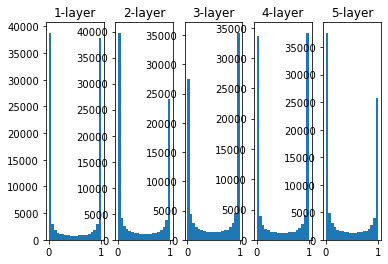

In [11]:
for i,a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(),20,range=(0,1))
plt.show()

## 표현력 제한
#### 표준편차 : 0.01

In [12]:
x = np.random.randn(1000,100)
node_num=100
hidden_layer_size=5
activations={}
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num,node_num)*0.01
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

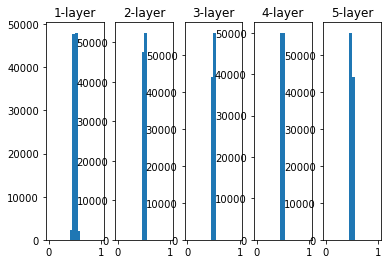

In [13]:
for i,a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1) +"-layer")
    plt.hist(a.flatten(),bins=20,range=(0,1))
plt.show()

## Xavier 초깃값
#### 표준편차 : 1/sqrt(n)
**선형적 활성함수에 적용**

In [14]:
x = np.random.randn(1000,100)
node_num=100
hidden_layer_size=5
activations={}
for i in range(hidden_layer_size):
    if i !=0:
        x = activations[i-1]
    w = np.random.randn(node_num,node_num) * (1/np.sqrt(node_num))
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

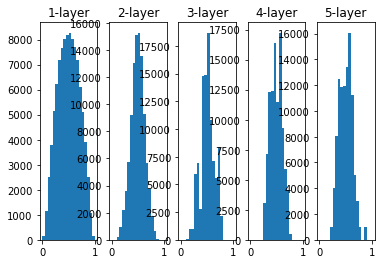

In [15]:
for i,a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(),bins=20,range=(0,1))
plt.show()

In [16]:
def tanh(x):
    return np.tanh(x)

## tanh function 사용

In [17]:
x = np.random.randn(1000,100)
node_num=100
hidden_layer_size=5
activations={}
for i in range(hidden_layer_size):
    if i !=0:
        x = activations[i-1]
    w = np.random.randn(node_num,node_num) * (1/np.sqrt(node_num))
    a = np.dot(x,w)
    z = tanh(a)
    activations[i] = z

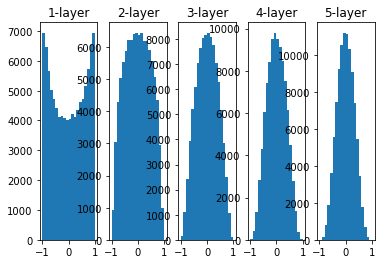

In [18]:
for i,a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(),bins=20,range=(-1,1))
plt.show()

## He 초깃값 & Relu Activation functoin
#### 표준편차 : sqrt(2/n)

In [19]:
def Relu(x):
    mask = 0>x
    x[mask]=0
    return x

In [20]:
def relu(x):
    return np.maximum(0, x)

In [52]:
x = np.random.randn(1000,100)
node_num=100
hidden_layer_size=5
activations={}
activations["0.01"]={}
activations["Xavier"]={}
activations["He"]={}

for i in range(hidden_layer_size):
    if i !=0:
        x = activations["0.01"][i-1]
    #w = np.random.randn(node_num,node_num) * np.sqrt(2.0/node_num)
    w = np.random.randn(node_num,node_num) * 0.01
    #w = np.random.randn(node_num,node_num) * (1/np.sqrt(node_num))
    a = np.dot(x,w)
    z = Relu(a)
    activations["0.01"][i] = z
    
for i in range(hidden_layer_size):
    if i !=0:
        x = activations["Xavier"][i-1]
    #w = np.random.randn(node_num,node_num) * np.sqrt(2.0/node_num)
    #w = np.random.randn(node_num,node_num) * 0.01
    w = np.random.randn(node_num,node_num)/np.sqrt(node_num)
    a = np.dot(x,w)
    z = Relu(a)
    activations["Xavier"][i] = z

for i in range(hidden_layer_size):
    if i !=0:
        x = activations["He"][i-1]
    w = np.random.randn(node_num,node_num) * np.sqrt(2.0/node_num)
    #w = np.random.randn(node_num,node_num) * 0.01
    #w = np.random.randn(node_num,node_num) * (1/np.sqrt(node_num))
    a = np.dot(x,w)
    z = Relu(a)
    activations["He"][i] = z

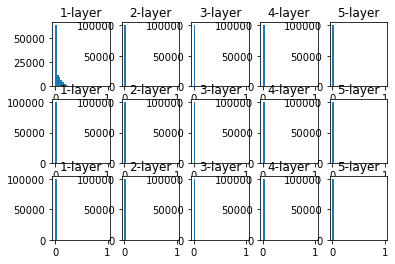

In [53]:
for i,a in activations["0.01"].items():
    plt.subplot(3,len(activations["0.01"]),i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(),bins=30,range=(0,1))

for i,a in activations["Xavier"].items():
    plt.subplot(3,len(activations["0.01"]),hidden_layer_size +i+1)
    plt.title(str(1+i)+"-layer")
    plt.hist(a.flatten(),bins=30,range=(0,1))
    
for i,a in activations["He"].items():
    plt.subplot(3,len(activations["0.01"]),hidden_layer_size*2 +i+1)
    plt.title(str(1+i)+"-layer")
    plt.hist(a.flatten(),bins=30,range=(0,1))
plt.show()

## Overfitting(과적합)
* 매개변수가 많고 표현력이 높은 모델(복잡한 모델)
* 훈련 데이터가 적은 경우

In [76]:
import sys,os
sys.path.append(os.curdir)
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [77]:
# class SGD:
#     def __init__(self,lr=0.01):
#         self.lr=lr
#         return
#     def update(self,params,grads):
#         for i in params.keys():
#             params[i] = params[i] - (self.lr*grads[i])
#         return

In [78]:
(x_train,t_train),(x_test,t_test)= load_mnist(normalize=True)
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784,hidden_size_list=[100,100,100,100,100,100],output_size=10)
optimizer = SGD(0.01)
max_epochs=201
train_size= x_train.shape[0]
batch_size=100
train_acc_list=[]
train_loss_list=[]
test_acc_list=[]

iter_per_epoch = max(1,train_size/batch_size)
epoch_cnt=0

for i in range(10000000):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch,t_batch)
    optimizer.update(network.params,grads)
    
    if i % iter_per_epoch==0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt+=1
        if epoch_cnt >= max_epochs:
            break

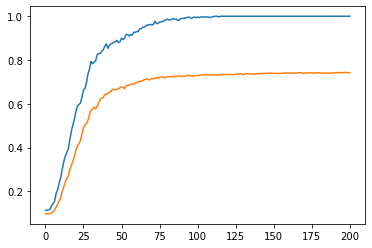

In [81]:
plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.show()

In [80]:
train_acc_list

[0.11333333333333333,
 0.11333333333333333,
 0.11666666666666667,
 0.11666666666666667,
 0.13333333333333333,
 0.14333333333333334,
 0.15333333333333332,
 0.19,
 0.20666666666666667,
 0.23666666666666666,
 0.26,
 0.3,
 0.3333333333333333,
 0.36,
 0.37666666666666665,
 0.3933333333333333,
 0.43333333333333335,
 0.47333333333333333,
 0.5033333333333333,
 0.5266666666666666,
 0.5633333333333334,
 0.59,
 0.5966666666666667,
 0.6033333333333334,
 0.63,
 0.6633333333333333,
 0.67,
 0.6966666666666667,
 0.7366666666666667,
 0.76,
 0.7933333333333333,
 0.7833333333333333,
 0.79,
 0.7966666666666666,
 0.8233333333333334,
 0.83,
 0.83,
 0.84,
 0.8466666666666667,
 0.8633333333333333,
 0.8733333333333333,
 0.8533333333333334,
 0.8666666666666667,
 0.8733333333333333,
 0.8766666666666667,
 0.88,
 0.8833333333333333,
 0.89,
 0.88,
 0.8833333333333333,
 0.9,
 0.8933333333333333,
 0.9,
 0.9166666666666666,
 0.9166666666666666,
 0.91,
 0.9166666666666666,
 0.9133333333333333,
 0.9266666666666666,
 0.9